In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Read in data to dataframe
df = pd.read_csv("penguins.csv")

In [3]:
# Explore data and wrangle, if needed
df.head()
df.drop(['studyName', 'Sample Number', 'Individual ID', 'Date Egg', 'Comments'], inplace=True, axis=1)

C:\Users\ethan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

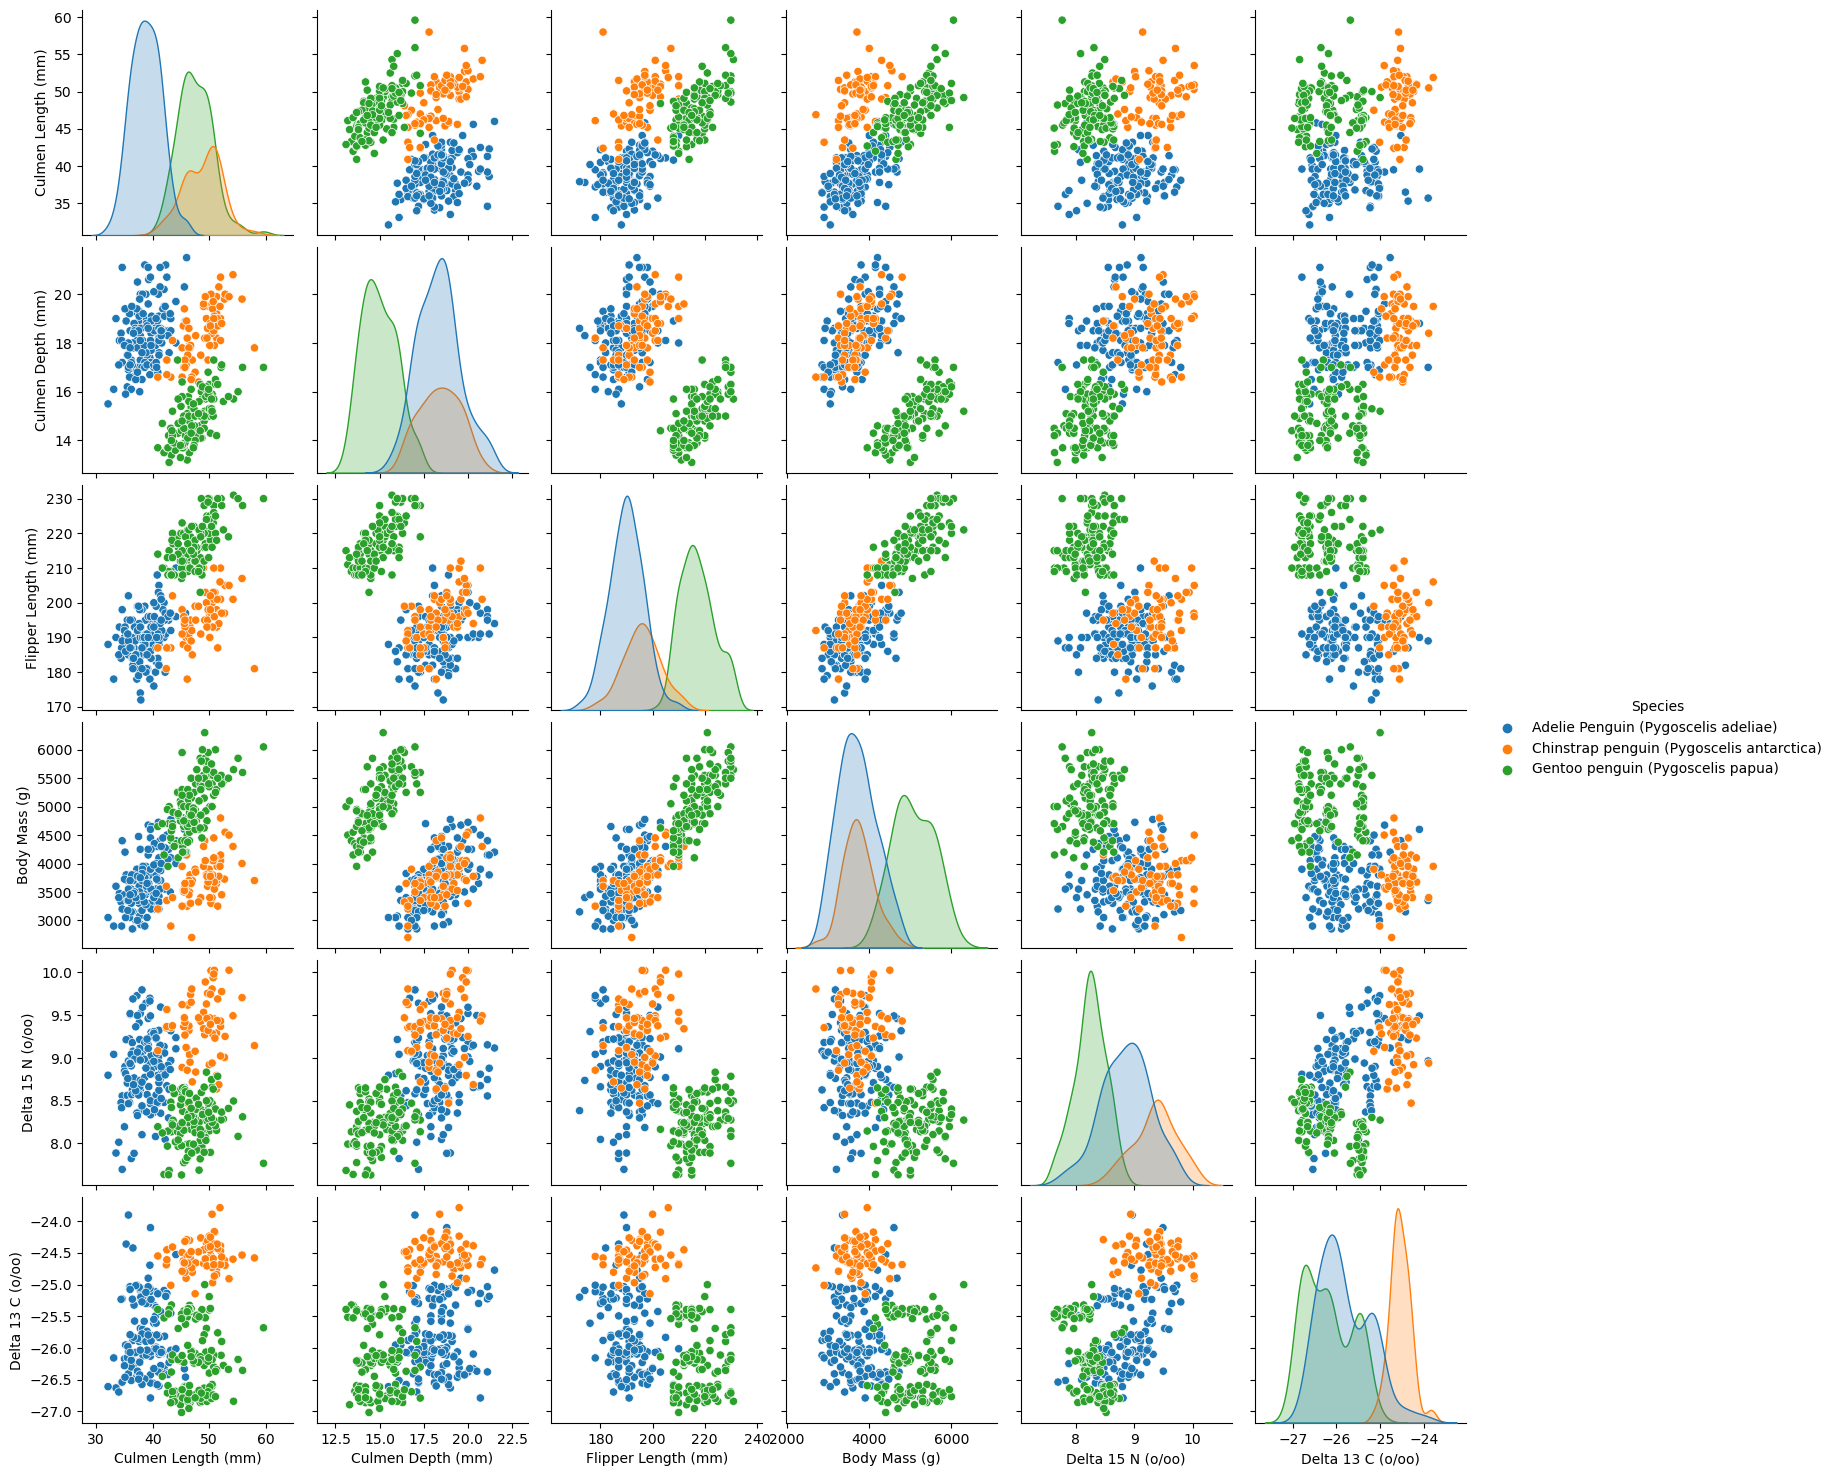

In [4]:
# Explore data and wrangle, if needed
# What feature separates the species the most?
sns.pairplot(data=df, hue="Species")

In [ ]:
# Train Decision Tree model
def train(df, feature, threshold1, threshold2):
    # Use a binary decision tree with 2 layers
    # Example:
        # Is island Biscoe? 
            # If yes, predict Adelie
            # If no, is island Torgersen?
                # If yes, predict Chinstrap
                # If no, predict Gentoo
    predictions = []
    for idx in range(len(df)):
        observation = df.iloc[idx][feature]
        if observation < threshold1:
            predictions.append("Adelie")
        else:
            if observation > threshold2:
                predictions.append("Chinstrap")
            else:
                predictions.append("Gentoo")
    return predictions

In [ ]:
df["Predictions"] = train(df, "Flipper Length (mm)", 200, 210)

In [ ]:
# Test model
def test(df):
    correct = 0
    for idx in range(len(df)):
        actual = df.iloc[idx]["Species"]
        predicted = df.iloc[idx]["Predictions"]
        if actual == predicted:
            correct = correct + 1
    return correct / len(df)

In [ ]:
print(str(test(df)) + "% correct") # Yikes! How can you change the train function so the model performs better?